# Heuristic optimization



Ejemplo de Optimización

$$ \textbf{x}=(x_1, x_2, x_3, x_4) $$

$$ 
minimize \textit{    } f(\textbf{x}) = x_1 x_4 (x_1 + x_2 + x_3) + x_3 \\
s. t. x_1x_2x_3x_4 \geq 25 \\
x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40 \\
1 \leq x_1, x_2, x_3, x_4 \leq 5 \\
\textit{Initial guess:    }x_0 = (1,5,5,1)
$$

donde se busca minimizar la función, sujeta a un par de condiciones, y dónde se tienen unos rangos determinados para los parámetros y un supuesto inicial que se puede utilizar para hacer que el algoritmo busque más rápido.

- Primero se utilizará la librería de scipy: https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize


In [3]:
# import basics
import numpy as np
import time
import math

# import scipy (MINIMIZE)
from scipy.optimize import minimize

# import SCE algorithm
from resources.SCE_algorithm import *
from resources.SCE_functioncall import *

# import plots
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# import warnings
import warnings
warnings.filterwarnings('ignore')

## Implementación con SCIPY

- Se define la función objetivo f(x)
- Se imponen las restricciones
- Se llama a la función [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

In [4]:
def objective(x):
    return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]
def constraint1(x):
    return x[0]*x[1]*x[2]*x[3] - 25.0
def constraint2(x):
    return x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 - 40.0

In [5]:
# Parámetros iniciales y valor de la función
x0 = [1,5,5,1]
print('La función a optimizar presenta un valor de {} con los parámetros iniciales'.format(objective(x0)))
print('**  SIN constraints  **')

La función a optimizar presenta un valor de 16 con los parámetros iniciales
**  SIN constraints  **


In [6]:
# Definimos rangos de búsqueda y restricciones
b = (1.0, 5.0)
bounds = (b,b,b,b)
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2}
cons = [con1, con2]

In [7]:
# Ejecutamos y validamos solución
sol = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
print('Los parámetros óptimos son: {}'.format(sol.x))
print('El mínimo de la función es: {}'.format(sol.fun))

Los parámetros óptimos son: [1.         4.74299607 3.82115466 1.37940764]
El mínimo de la función es: 17.01401724556073


## Implementación con SCE-UA


- SCE_algorithm.py: contiene el algoritmo desarrollado por Q.Duan, 9/2004 - converted to python by Van Hoey S.2011 (https://github.com/stijnvanhoey/Optimization_SCE)
- SCE_functioncall.py: contiene las funciones que se muestran en el notebook, y una función EvalObjF(), que llama a las funciones que se quiera dependiendo del valor del parámetro **testnr**


- Definimos la función a evaluar y sus restricciones
- Esta vez, la igualdad se define de forma diferente para optimizar la búsqueda
- Una vez tenemos la función play(), insertar en SCE_functioncall.py
- Ejecutamos la función de búsqueda sceua (script SCE_algorithm.py) con testnr=4

In [8]:
def constraint(x):
    return x[0]*x[1]*x[2]*x[3] - 25.0

# def play(x):
#     '''
#     This is the play function
#     '''
    
#     if constraint(x)>=0.0:
#         try:
#             x[2] = math.sqrt(40.0 - x[0]**2 - x[1]**2 - x[3]**2)
#         except:
#             return 1000
#         return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]
#     else:
#         return 1000

In [9]:
# Parámetros del modelo SCE-UA:
#     se puede concultar su significado en SCE_algorithm.py

iseed   = 0
iniflg  = 0
ngs     = 4
peps    = 0.0001
maxn    = 10000
kstop   = 40
pcento  = 0.0001

In [10]:
# De nuevo, definimos rangos y estimación inicial
bl = np.ones(4)
bu = np.ones(4) * 5.0
x0 = np.array(x0) # previamente definido
# Buscamos los parámetros óptimos
bestx,bestf,BESTX,BESTF,ICALL = sceua(x0,bl,bu,maxn,kstop,pcento,peps,ngs,iseed,iniflg, testnr=4)

In [11]:
print('SCIPY parameters:', sol.x)
print('Function SCIPY value:', sol.fun)
print('SCE parameters:', bestx)
print('Function SCE value:', bestf)


SCIPY parameters: [1.         4.74299607 3.82115466 1.37940764]
Function SCIPY value: 17.01401724556073
SCE parameters: [1.18453711 4.96273555 3.55079398 1.16618602]
Function SCE value: 16.947612187003628


### Validamos resultados

Los parámetros deben cumplir constraints 1 y 2:

In [12]:
print('SCE:')
print('El valor de constraint1() debe ser mayor que 0 y es: {}'.format(constraint1(bestx)))
print('El valor de constraint2() debe ser 0 y es: {}'.format(constraint2(bestx)))
print('SCIPY:')
print('El valor de constraint1() debe ser mayor que 0 y es: {}'.format(constraint1(sol.x)))
print('El valor de constraint2() debe ser 0 y es: {}'.format(constraint2(sol.x)))

SCE:
El valor de constraint1() debe ser mayor que 0 y es: -0.6576160304274339
El valor de constraint2() debe ser 0 y es: -7.105427357601002e-15
SCIPY:
El valor de constraint1() debe ser mayor que 0 y es: -5.487420651206776e-08
El valor de constraint2() debe ser 0 y es: 8.242878379860485e-08


Text(0, 0.5, 'Function value')

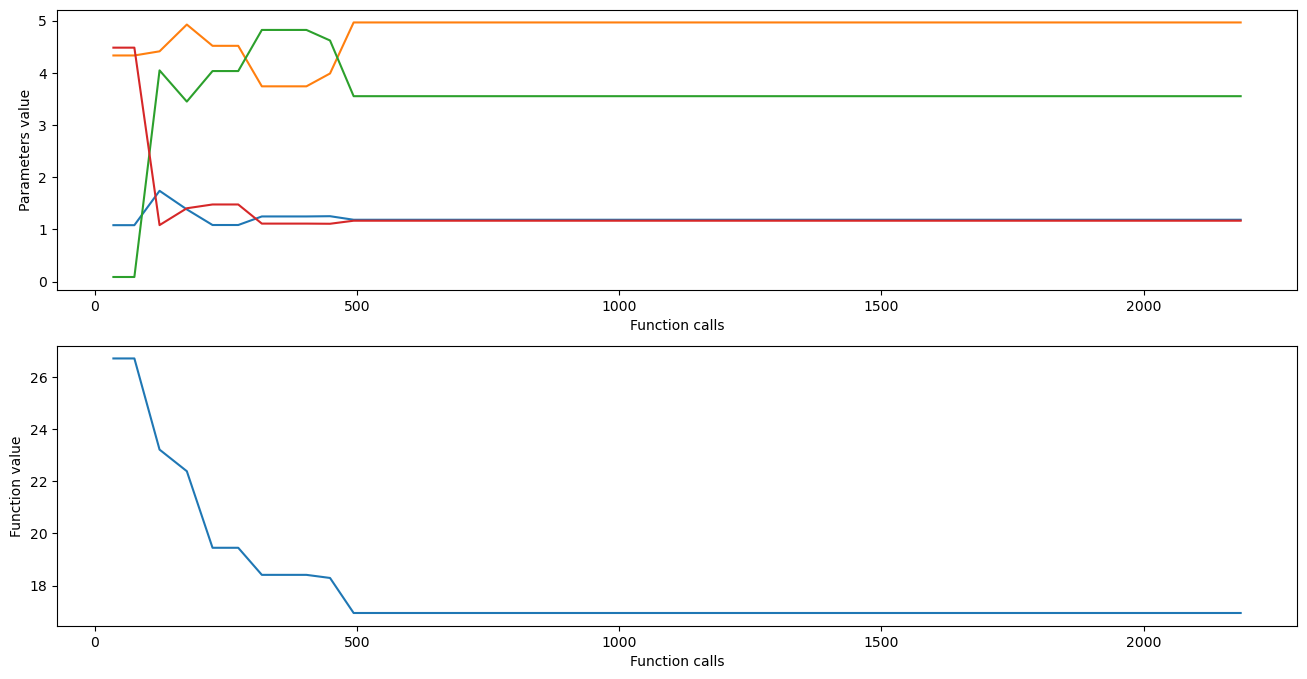

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(ICALL, BESTX)
plt.xlabel('Function calls')
plt.ylabel('Parameters value')
plt.subplot(212)
plt.plot(ICALL, BESTF)
plt.xlabel('Function calls')
plt.ylabel('Function value')

## More Optimization Problems

Una vez resuelto el primer problema, ahora vamos a abordar la optimización de funciones mucho más complejas, que de verdad evaluarán la eficiencia de los algoritmos que se están utilizando.

Para ello, se intentarán optimizar 2 funciones distintas:

- [Función de Rosenbrock](https://en.wikipedia.org/wiki/Rosenbrock_function)
- [Función de Griewank](https://en.wikipedia.org/wiki/Griewank_function)


### Rosenbrock  Function

In [14]:
def rosenbrock(x):
    '''
    This is the Rosenbrock Function
    Bound: X1=[-10,10], X2=[-10,10]; Global Optimum: 0.0, (1,1)
    '''
    
    return (100.0*(x[1]-x[0]**2))**2 + (1.0-x[0])**2


In [15]:
xx, yy = np.meshgrid(np.linspace(-10,10,41), np.linspace(-10,10,41))
zz = rosenbrock([xx,yy])

Text(0.5, 0.92, 'Rosenbrock function')

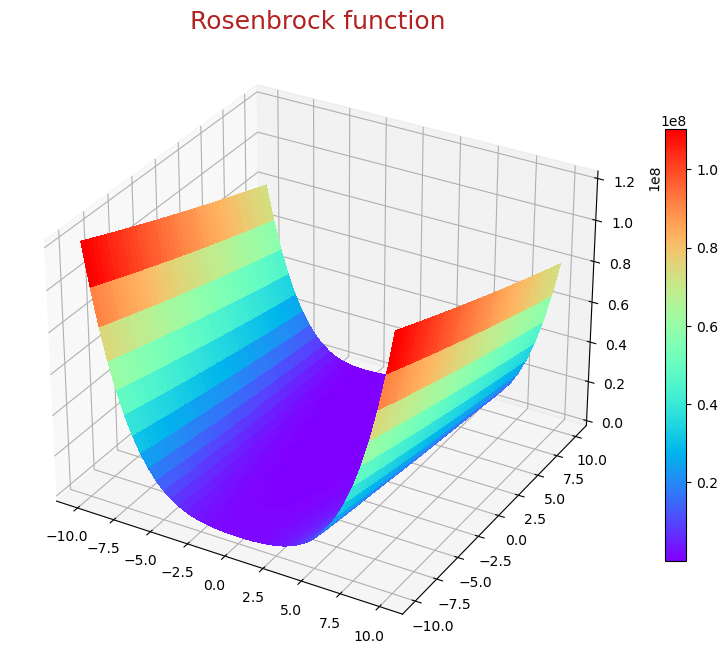

In [16]:
fig, ax = plt.subplots(figsize = [10,8], subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, zz, cmap='rainbow',
                       linewidth=0, antialiased=False)
plt.colorbar(surf, shrink = 0.7)
ax.set_title('Rosenbrock function', color = 'firebrick', fontsize = 18)

In [17]:
# ROSENBROCK
# Parámetros iniciales y valor de la función
x0 = [-5,5]
print('La función a optimizar presenta un valor de {} con los parámetros iniciales'.format(rosenbrock(x0)))
# Definimos rangos de búsqueda sin restricciones
b = (-10.0, 10.0)
bounds = (b,b)
# Ejecutamos y validamos solución
sol = minimize(rosenbrock, x0, method='BFGS', bounds=bounds)
# De nuevo, definimos rangos y estimación inicial para SCE
bl = np.ones(2) * -10.0
bu = np.ones(2) * 10.0
x0 = np.array(x0)
# Parametros de SCE-UA
iseed   = 0
iniflg  = 0
ngs     = 4
peps    = 0.0001
maxn    = 10000
kstop   = 40
pcento  = 0.0001
# Buscamos los parámetros óptimos
bestx,bestf,BESTX,BESTF,ICALL = sceua(x0,bl,bu,maxn,kstop,pcento,peps,ngs,iseed,iniflg, testnr=1)

La función a optimizar presenta un valor de 4000036.0 con los parámetros iniciales


In [18]:
print('SCIPY parameters:', sol.x)
print('Function SCIPY value:', sol.fun)

print('SCE parameters:', bestx)
print('Function SCE value:', bestf)


SCIPY parameters: [0.99955328 0.99910674]
Function SCIPY value: 1.995631096431853e-07
SCE parameters: [0.99999765 0.99999528]
Function SCE value: 8.66924042560432e-12


### Griewank Function

In [19]:
def griewank(x):
    '''
    This is the Griewank Function (2-D)
    Bound: X(i)=[-10,10], for i=1,2
    Global Optimum: 0, at origin
    '''
    
    return (x[0]**2+x[1]**2)/4000.0 - np.cos(x[0]/np.sqrt(1))*np.cos(x[1]/np.sqrt(2)) + 1

In [20]:
xx, yy = np.meshgrid(np.linspace(-100, 100, 101), np.linspace(-100, 100, 101))
zz = griewank([xx,yy])

Text(0.5, 0.92, 'Griewank function')

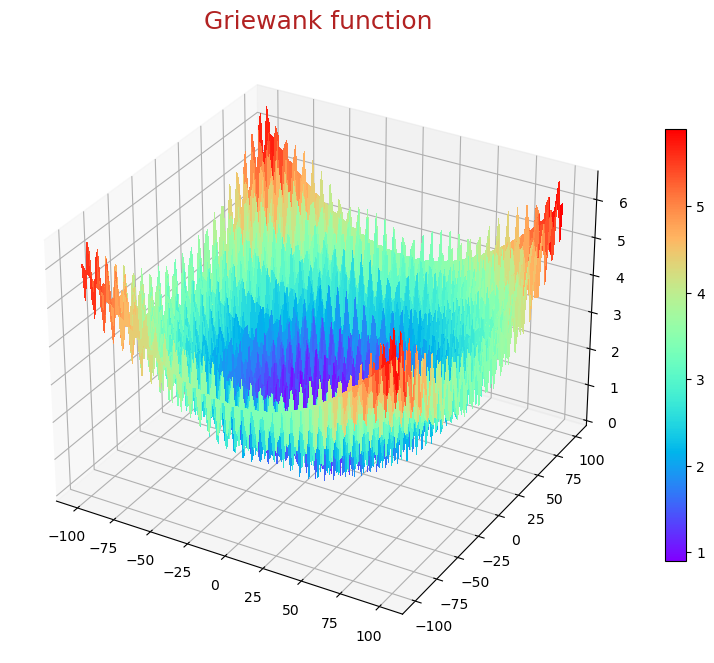

In [21]:
fig, ax = plt.subplots(figsize = [10,8], subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, zz, cmap='rainbow',
                       linewidth=0, antialiased=False)
plt.colorbar(surf, shrink = 0.7)
ax.set_title('Griewank function', color = 'firebrick', fontsize = 18)

In [22]:
# GRIEWANK
# Parámetros iniciales y valor de la función
x0 = [30,30]
print('La función a optimizar presenta un valor de {} con los parámetros iniciales'.format(griewank(x0)))
# Definimos rangos de búsqueda sin restricciones
b = (-100.0, 100.0)
bounds = (b,b)
# Ejecutamos y validamos solución
sol = minimize(griewank, x0, method='BFGS', bounds=bounds)
# De nuevo, definimos rangos y estimación inicial para SCE
bl = np.ones(2) * -100.0
bu = np.ones(2) * 100.0
x0 = np.array(x0)
# Parametros de SCE-UA
iseed   = 0
iniflg  = 0
ngs     = 10
peps    = 0.0000001
maxn    = 20000
kstop   = 30
pcento  = 0.0000001
# Buscamos los parámetros óptimos en N iteraciones
N = 100
Ni = 0
N_retry = 0
loss_function = np.zeros((N, 40))
best_loss_function = 999999
best_parameters = np.zeros(2)
while Ni < N:
    try:
        bestx,bestf,BESTX,BESTF,ICALL = sceua(x0,bl,bu,maxn,kstop,pcento,peps,ngs,iseed,iniflg, testnr=2)
        loss_function[Ni,:] = BESTF[0:40]
        if bestf<best_loss_function:
            best_loss_function = bestf
            best_parameters = bestx
        Ni += 1
    except:
        if N_retry%20==0:
            print('Retrying...')
        N_retry += 1
print('We retry {} times!'.format(N_retry))

La función a optimizar presenta un valor de 1.5598821274167924 con los parámetros iniciales
Retrying...
We retry 10 times!


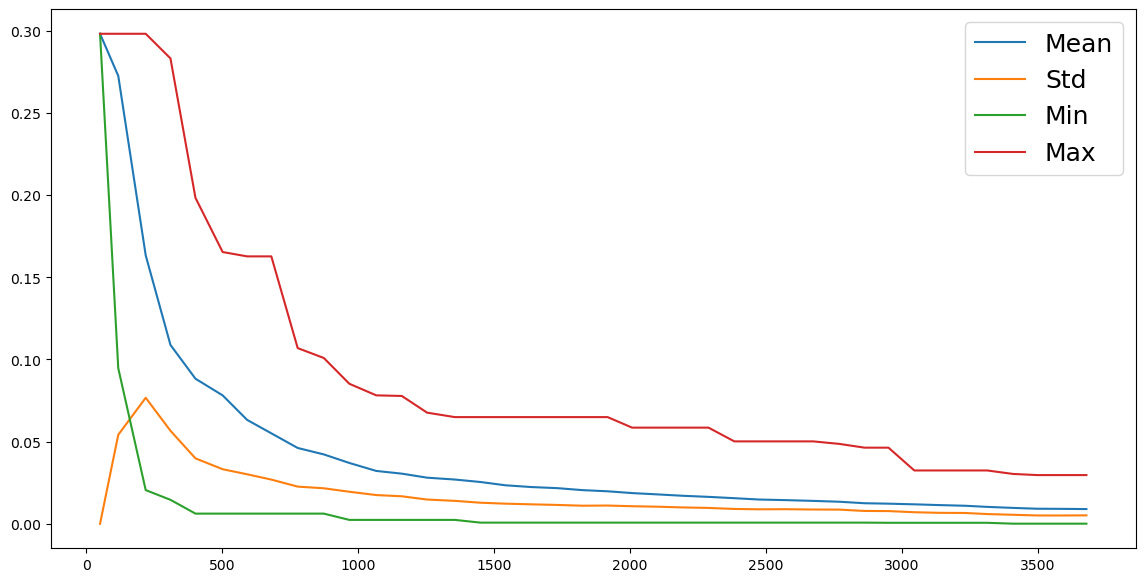

In [23]:
fig = plt.figure(figsize=(14,7))
plt.plot(ICALL[0:40], np.stack([np.mean(loss_function, axis=0),
                                np.std(loss_function, axis=0),
                                np.min(loss_function, axis=0),
                                np.max(loss_function, axis=0)]).T)
plt.legend(['Mean', 'Std', 'Min', 'Max'], fontsize=18)

In [24]:
print('SCIPY parameters:', sol.x)
print('Function SCIPY value:', sol.fun)
print('SCE parameters:', best_parameters)
print('Function SCE value:', best_loss_function)


SCIPY parameters: [28.26019938 31.0691066 ]
Function SCIPY value: 0.44132331792817525
SCE parameters: [8.86108012e-09 1.19006754e-08]
Function SCE value: 0.0


Text(0, 0.5, 'Function value')

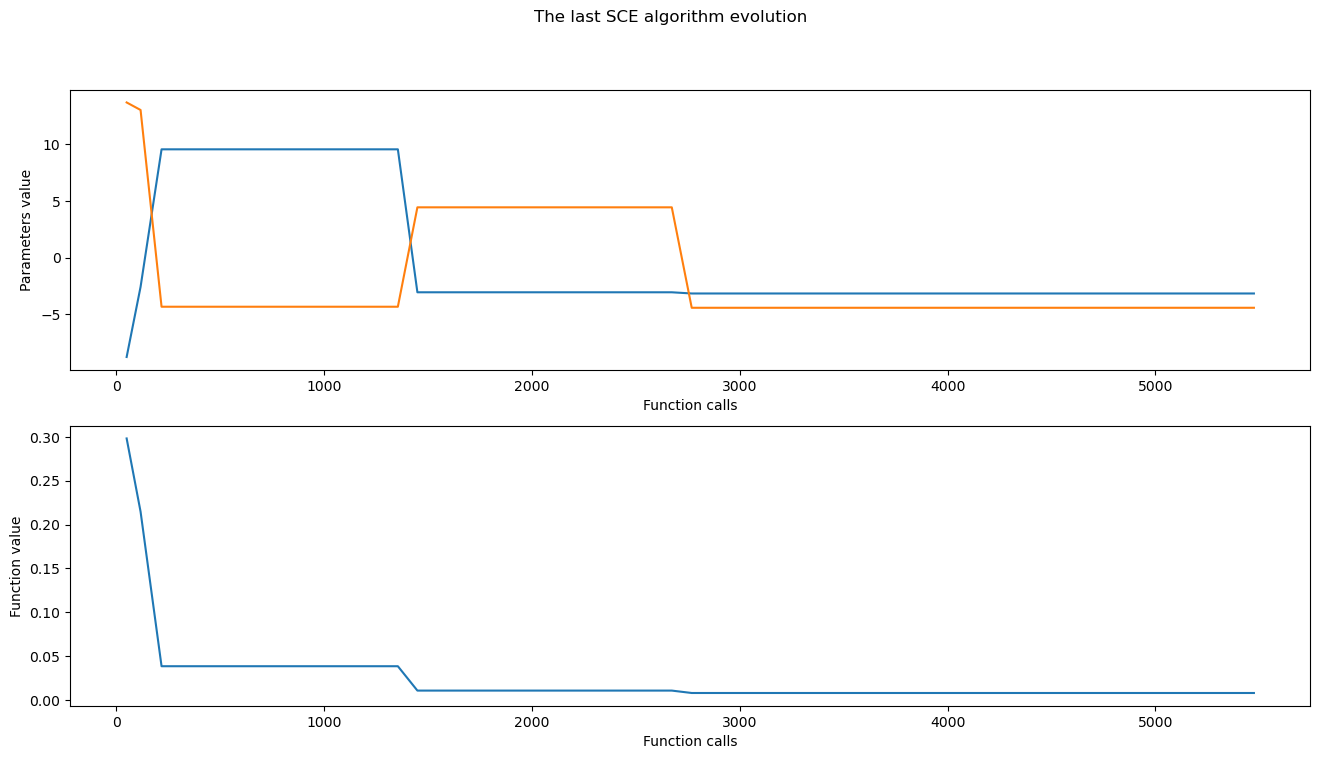

In [25]:
plt.figure(figsize=(16,8))
plt.suptitle('The last SCE algorithm evolution')
plt.subplot(211)
plt.plot(ICALL, BESTX)
plt.xlabel('Function calls')
plt.ylabel('Parameters value')
plt.subplot(212)
plt.plot(ICALL, BESTF)
plt.xlabel('Function calls')
plt.ylabel('Function value')

### Resumen de Rosenbrock y Grienwank

Cómo se puede observar, scipy consigue optimizar la función de Rosenbrock, al ser esta mucho más sencilla, pero en lo que respecta a la función Griewank, scipy no es capaz de alcanzar el óptimo mientras que el algoritmo SCE sí que lo obtiene

